# Feature Scaling

Feature scaling though standardization and normalization can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Normalalization, in this context, refers to removing the skew from the data. 

**NOTE:** Remember that Normalization can mean many things. 

https://en.wikipedia.org/wiki/Normalization_(statistics)

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

To illustrate this, PCA is performed comparing the use of data with StandardScaler applied, to unscaled data. The results are visualized and a clear difference noted.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline

from scipy.stats import boxcox

In [2]:
np.random.seed(1)

In [3]:
CLF = LogisticRegression(C=1E-6)

In [5]:
pwd

'/home/jovyan/feature_extraction/ipynb'

In [10]:
wine_df = pd.read_csv('../data/wine.csv', header=None)

In [12]:
y = wine_df[0]
X = wine_df.drop(0, axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Compare Performance of three Model Pipelines

### Train and Predict an Unscaled Classifier

In [28]:
![](http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUFAPcHZUV9C1U1B3zkksLs5My0wtUueqBQDW7Ast)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [21]:
unscaled_clf = make_pipeline(PCA(n_components=2), 
                             CLF)
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

### Train and Predict a Scaled Classifier

In [22]:
std_clf = make_pipeline(StandardScaler(), 
                        PCA(n_components=2), 
                        CLF)
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

### Train and Predict a Deskewed, Scaled Classifier

There is no deskew class in `sklearn` so we can not put this in a `Pipeline`.

In [23]:
sc = StandardScaler()
pc = PCA(n_components=2)
clf = CLF

In [24]:
X_tr_bc = pd.DataFrame()
X_ts_bc = pd.DataFrame()
for col in X_train.columns:
    box_cox_trans_tr, lmbda = boxcox(X_train[col])
    box_cox_trans_ts = boxcox(X_test[col], lmbda)
    X_tr_bc[col] = pd.Series(box_cox_trans_tr)
    X_ts_bc[col] = pd.Series(box_cox_trans_ts)

/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:2189: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1855: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - 

In [29]:
dsk_std_clf = make_pipeline(StandardScaler(), 
                            PCA(n_components=2), 
                            CLF)
dsk_std_clf.fit(X_tr_bc, y_train)
pred_test_std = dsk_std_clf.predict(X_ts_bc)

In [30]:
X_tr_bc_sc = sc.fit_transform(X_tr_bc)
X_ts_bc_sc = sc.transform(X_ts_bc)

In [31]:
X_tr_bc_sc_pc = pc.fit_transform(X_tr_bc_sc)
X_ts_bc_sc_pc = pc.transform(X_ts_bc_sc)

In [32]:
CLF.fit(X_tr_bc_sc_pc, y_train)
pred_test_dsk_std = CLF.predict(X_ts_bc_sc_pc)

#### Prediction accuracy for the normal test dataset with PCA

In [33]:
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

73.33%



#### Prediction accuracy for the standardized test dataset with PCA

In [34]:
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

95.56%



#### Prediction accuracy for the deskewed, standardized test dataset with PCA

In [35]:
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_dsk_std)))

95.56%



## Visualize Two Principal Component Analyses

### Pull the PCA models from the Pipeline

In [36]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']
pca_dsk_std = dsk_std_clf.named_steps['pca']

### Perform the Data Transformations

In [37]:
scaler = std_clf.named_steps['standardscaler']
X_train_pca = pca.transform(X_train)
X_train_std_pca = pca_std.transform(scaler.transform(X_train))
X_train_dsk_std_pca = pca_dsk_std.transform(scaler.transform(X_tr_bc))

### Visualize standardized vs. untouched dataset with PCA performed

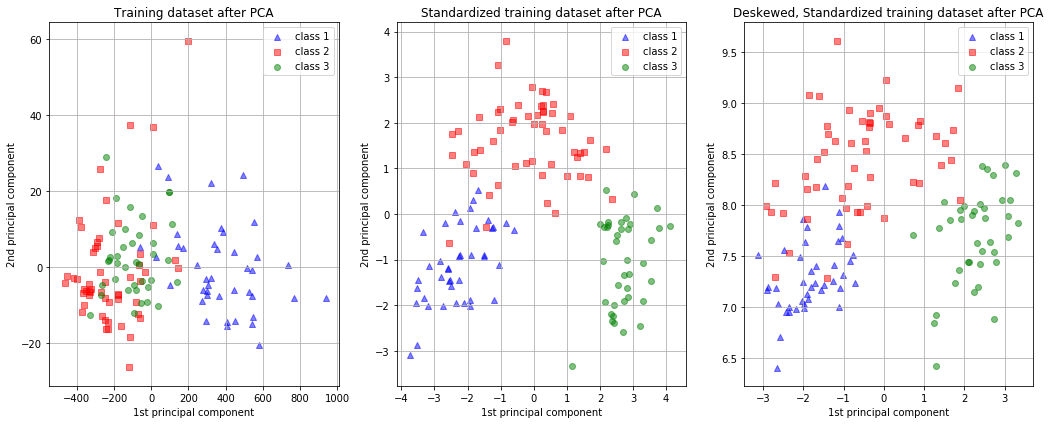

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6))

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_pca[y_train == l, 0], X_train_std_pca[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax3.scatter(X_train_dsk_std_pca[y_train == l, 0], X_train_dsk_std_pca[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')
ax3.set_title('Deskewed, Standardized training dataset after PCA')

for ax in (ax1, ax2, ax3):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()